### Chip Dataset Project

1. Load Data  
2. Handle Missing Values & Clean Data  
3. Exploratory Data Analysis (EDA)  
4. Feature Engineering + Encoding  
5. Assumption Checks (Moore’s Law & Scaling Trends)  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [10]:
df = pd.read_csv("chip_dataset.csv")

df.head()


,Unnamed: 0,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN


In [53]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (4854, 14)


In [54]:
print(f"Columns: {list(df.columns)}")

Columns: ['Unnamed: 0', 'Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)', 'Foundry', 'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS']


In [13]:
df.columns

Index(['Unnamed: 0', 'Product', 'Type', 'Release Date', 'Process Size (nm)',
       'TDP (W)', 'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)',
       'Foundry', 'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')

In [55]:
print("Data types:")
print(df.dtypes)

Data types:
Unnamed: 0                 int64
Product                   object
Type                      object
Release Date              object
Process Size (nm)        float64
TDP (W)                  float64
Die Size (mm^2)          float64
Transistors (million)    float64
Freq (MHz)               float64
Foundry                   object
Vendor                    object
FP16 GFLOPS              float64
FP32 GFLOPS              float64
FP64 GFLOPS              float64
dtype: object


In [15]:
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
        Unnamed: 0  Process Size (nm)      TDP (W)  Die Size (mm^2)  \
count  4854.000000        4845.000000  4228.000000      4139.000000   
mean   2426.500000          55.109598    81.359981       188.440445   
std    1401.373433          44.998676    76.807808       126.189383   
min       0.000000           0.000000     1.000000         1.000000   
25%    1213.250000          22.000000    33.000000       104.000000   
50%    2426.500000          40.000000    65.000000       148.000000   
75%    3639.750000          90.000000   100.000000       239.000000   
max    4853.000000         250.000000   900.000000       826.000000   

       Transistors (million)   Freq (MHz)    FP16 GFLOPS   FP32 GFLOPS  \
count            4143.000000  4854.000000     536.000000   1948.000000   
mean             1929.922279  1484.406057    8397.459851   2134.756653   
std              4044.891098  1066.701523   13799.551131   3898.431487   
min                 8.000000   100.000000    

### Handling missing data

In [18]:
df.shape
#shape of the dataset
# It returns a tuple representing the dimensionality of the DataFrame (number of rows, number of columns).

(4854, 14)

In [17]:
missing_data = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
    })
    
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)
missing_data

,Column,Missing_Count,Missing_Percentage
FP16 GFLOPS,FP16 GFLOPS,4318,88.957561
FP64 GFLOPS,FP64 GFLOPS,3548,73.094355
FP32 GFLOPS,FP32 GFLOPS,2906,59.868150
Die Size (mm^2),Die Size (mm^2),715,14.730119
Transistors (million),Transistors (million),711,14.647713
TDP (W),TDP (W),626,12.896580
Process Size (nm),Process Size (nm),9,0.185414
Release Date,Release Date,0,0.000000
Unnamed: 0,Unnamed: 0,0,0.000000
Product,Product,0,0.000000


In [20]:
  # Categorize missingness
high_missing = missing_data[missing_data['Missing_Percentage'] > 50]
moderate_missing = missing_data[(missing_data['Missing_Percentage'] > 20) & (missing_data['Missing_Percentage'] <= 50)]
low_missing = missing_data[missing_data['Missing_Percentage'] <= 20]

In [23]:
print(f"\nHigh missingness (>50%): {len(high_missing)} columns")
if len(high_missing) > 0:
    print(high_missing['Column'].tolist())
    
print(f"\nModerate missingness (20%-50%): {len(moderate_missing)} columns")
if len(moderate_missing) > 0:
    print(moderate_missing['Column'].tolist())
    
print(f"\nLow missingness (<20%): {len(low_missing)} columns")


High missingness (>50%): 3 columns
['FP16 GFLOPS', 'FP64 GFLOPS', 'FP32 GFLOPS']

Moderate missingness (20%-50%): 0 columns

Low missingness (<20%): 11 columns


### Data cleaning

- Convert dates properly  
- Fix numeric formats (e.g., "2.5 GHz" → 2500 MHz)  
- Impute missing values (median for numerics, "Unknown" for categories)  
- Drop irrelevant columns (e.g., product name if not needed) 

In [ ]:
def clean_dataset(df):
    df = df.copy()
#Makes a copy of the dataframe so we don’t accidentally overwrite the original.

    # Dates
    if "Release Date" in df.columns:
        df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")
        #convert to datetime format with error handling
        #coerce will turn invalid parsing into NaT
        df["Release_Year"] = df["Release Date"].dt.year
        #Creates a new column "Release_Year" (just the year, extracted from the full date)

    # Numericals
    num_cols = ["Process Size (nm)", "TDP (W)", "Die Size (mm²)", "Transistors (million)", "Freq (MHz)"]
    #define a list of numerical columns to clean

     # Clean and convert numerical columns
    for col in num_cols:
        if col in df:
            df[col] = pd.to_numeric(df[col].astype(str).str.extract(r"(\d+\.?\d*)")[0], errors="coerce")
            # Extract numeric part and convert to float, coercing errors to NaN
            df[col].fillna(df[col].median(), inplace=True)
            # Fill missing values with median of the column to avoid skewing the data

    # Categoricals
    for col in ["Type", "Vendor", "Foundry"]:
        if col in df:
            df[col].fillna("Unknown", inplace=True)
            # Fill missing categorical values with "Unknown"
            #fillna replaces NaN values with a specified value, in this case "Unknown"
            #inplace=True modifies the original dataframe instead of returning a new one
            
    # Drop irrelevant columns
    if "Product" in df: df.drop("Product", axis=1, inplace=True)
    # Drop the "Product" column if it exists, as it is not relevant for analysis

    return df

df_clean = clean_dataset(df)
# Cleaned dataset
df_clean.head()


,Unnamed: 0,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS,Release_Year
0,0,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN,2007.0
1,1,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN,2018.0
2,2,CPU,2020-09-02,10.0,28.0,NaN,624.0,2600.0,Intel,Intel,NaN,NaN,NaN,2020.0
3,3,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN,2013.0
4,4,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN,2011.0


### Exploratory Data Analysis (EDA)

- Distribution of chip types  
- Process size trends  
- Correlations between key numerical features  


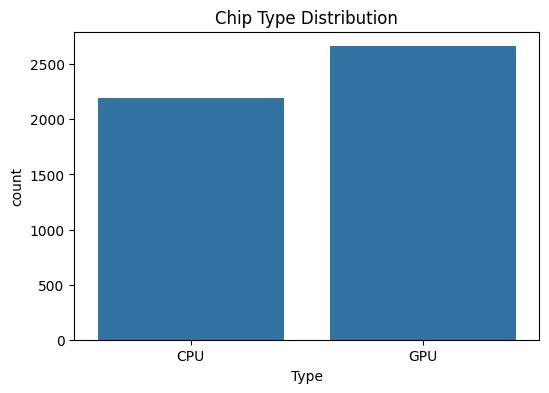

In [60]:
# Distribution of chip types
# Shows how many CPUs, GPUs, etc. are in the dataset to know if either type dominates 
plt.figure(figsize=(6,4))
sns.countplot(x="Type", data=df_clean)
#countplot is used to show the counts of observations in each categorical bin using bars
plt.title("Chip Type Distribution")
plt.show()


In [ ]:
# Process size trends - Boxplot
# Compares process sizes across different chip types to see if certain types use more advanced manufacturing
# plt.figure(figsize=(10,6))
# sns.boxplot(x="Type", y="Process Size (nm)", data=df_clean)
# plt.title("Process Size by Chip Type")
# plt.show()

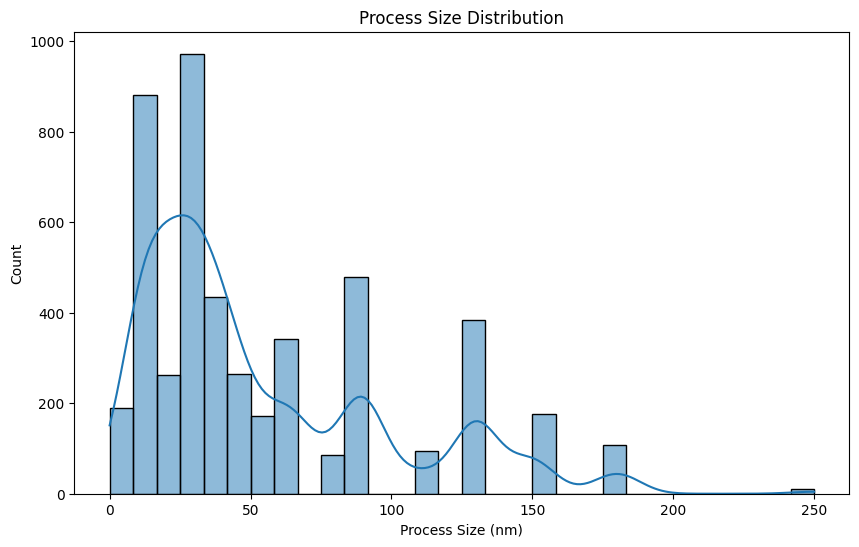

In [61]:
# Process size trends
# Shows how the process size has changed over the years, indicating technological advancements
plt.figure(figsize=(10,6))
sns.histplot(df_clean["Process Size (nm)"].dropna(), bins=30, kde=True)
#histplot is used to plot the distribution of a univariate set of observations.
# The kde=True adds a Kernel Density Estimate line to the histogram, providing a smoothed estimate of the distribution.
plt.title("Process Size Distribution")  
plt.xlabel("Process Size (nm)")
plt.show()

### Step 4: Feature Engineering + Encoding  

Adding new features:  
- **Transistor Density** = Transistors / Die Size  
- **Power Efficiency** = Frequency / TDP  
- **Chip Age** = Years since release  

Then we encode categorical columns into numeric values for ML.  

In [34]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
if {"Transistors (million)", "Die Size (mm²)"}.issubset(df_clean):
    #issubset checks if all elements of the set are in the dataframe columns
    df_clean["Transistor_Density"] = df_clean["Transistors (million)"] / df_clean["Die Size (mm²)"]

if {"Freq (MHz)", "TDP (W)"}.issubset(df_clean):
    df_clean["Power_Efficiency"] = df_clean["Freq (MHz)"] / df_clean["TDP (W)"]

if "Release_Year" in df_clean:
    df_clean["Chip_Age"] = 2025 - df_clean["Release_Year"]

# --- Encode Categorical Columns ---
le = LabelEncoder()
for col in df_clean.select_dtypes("object").columns:
    df_clean[col] = le.fit_transform(df_clean[col])
    #fit_transform both fits the label encoder and transforms the column in one step
    #label encoding is used to convert categorical text data into numerical labels for model compatibility

df_clean.head()

,Unnamed: 0,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS,Release_Year,Power_Efficiency,Chip_Age
0,0,0,2007-02-20,65.0,45.0,77.0,122.0,2200.0,9,0,NaN,NaN,NaN,2007.0,48.888889,18.0
1,1,0,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,9,0,NaN,NaN,NaN,2018.0,91.428571,7.0
2,2,0,2020-09-02,10.0,28.0,NaN,624.0,2600.0,2,2,NaN,NaN,NaN,2020.0,92.857143,5.0
3,3,0,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,2,2,NaN,NaN,NaN,2013.0,22.500000,12.0
4,4,0,2011-05-03,45.0,125.0,258.0,758.0,3700.0,9,0,NaN,NaN,NaN,2011.0,29.600000,14.0


### Assumption Validation  

- **Moore’s Law**: the number of transistors on an integrated circuit **DOUBLES** roughly every two years, leading to increased computing power, smaller device sizes, and decreased manufacturing costs.  

- **Scaling Trends**: Process size shrinks over time.  


In [39]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

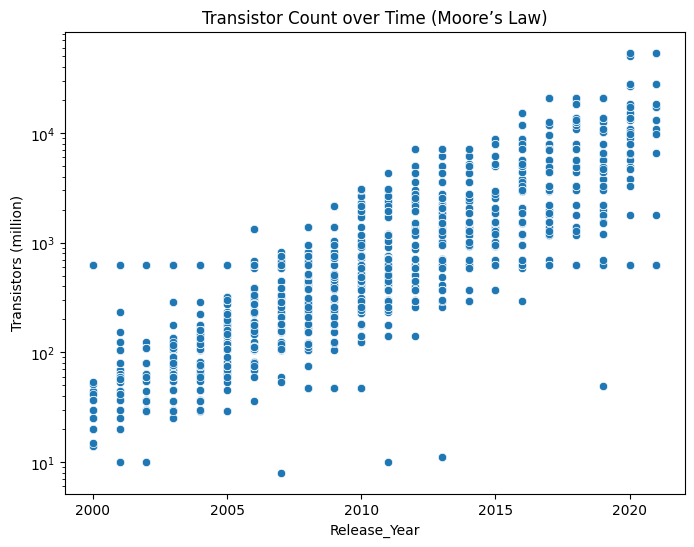

In [ ]:
# Transistors over time (Moore's Law check)

plt.figure(figsize=(8,6))
sns.scatterplot(x="Release_Year", y="Transistors (million)", data=df_clean)
plt.yscale("log")  # Log scale makes exponential growth clearer - straighter line
plt.title("Transistor Count over Time (Moore’s Law)")
plt.show()

In [ ]:
from matplotlib.ticker import MultipleLocator

# module used to control the placement of ticks on an axis.
# It is a tick locator that places ticks at regular intervals, specifically at integer multiples of a specified "base" value within the view interval of the axis.

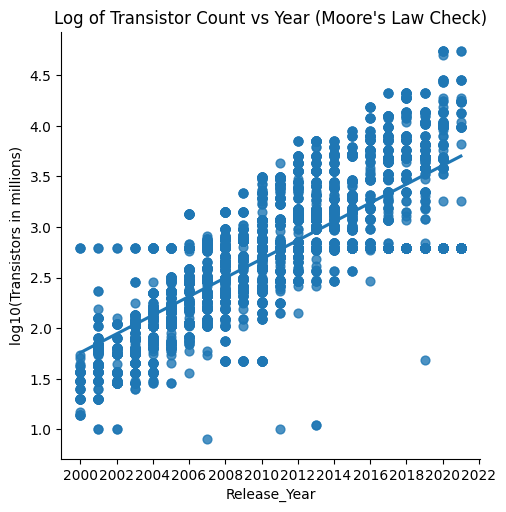

In [ ]:
# Fit a line in log space to check linearity
df_clean["log_transistors"] = np.log10(df_clean["Transistors (million)"])

sns.lmplot(x="Release_Year", y="log_transistors", data=df_clean, ci=None, scatter_kws={"s":40})
plt.title("Log of Transistor Count vs Year (Moore's Law Check)")
plt.ylabel("log10(Transistors in millions)")

# Adjust x-axis ticks to every 2 years
ax = plt.gca()
#gca gets the current Axes instance on the current figure matching the given keyword args, or creates one.
ax.xaxis.set_major_locator(MultipleLocator(2))

plt.show()

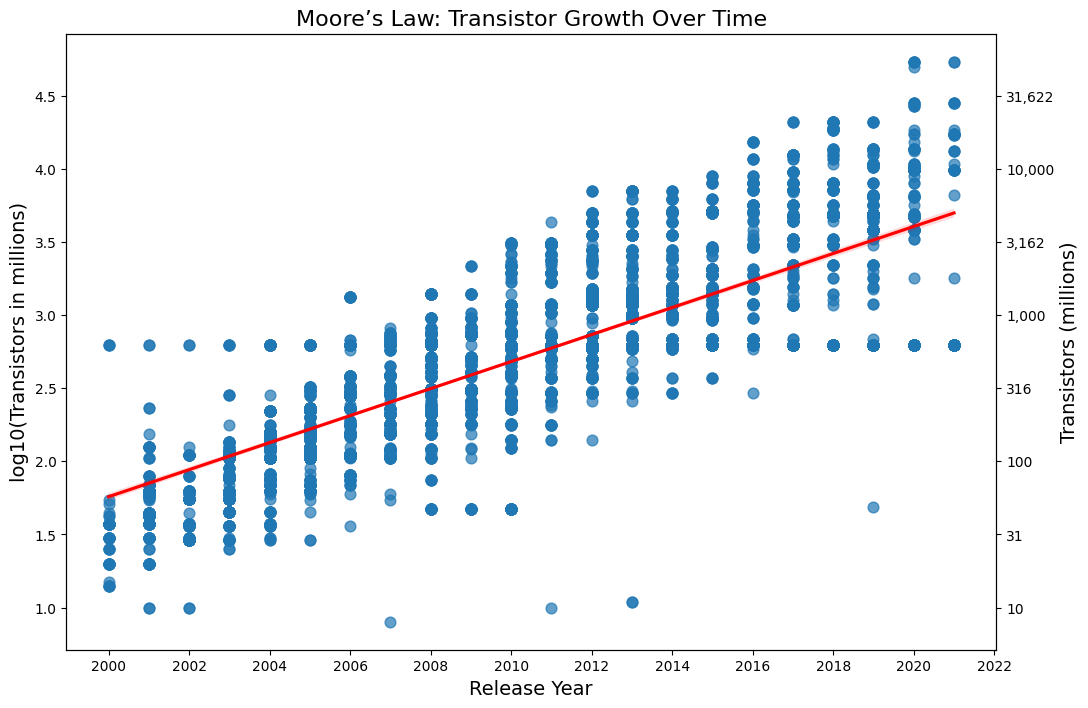

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

# Add log of transistors
df_clean["log_transistors"] = np.log10(df_clean["Transistors (million)"])

# Create figure and axis
plt.figure(figsize=(12, 8))  # Larger figure size

# Scatter + regression line (log scale)
#regplot gives a scatterplot with a regression line fit to the data.
sns.regplot(
    x="Release_Year", 
    y="log_transistors", 
    data=df_clean, 
    scatter_kws={"s": 60, "alpha": 0.7}, 
    line_kws={"color": "red"}
)

plt.title("Moore’s Law: Transistor Growth Over Time", fontsize=16)
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("log10(Transistors in millions)", fontsize=14)

# Adjust x-axis ticks (every 2 years)
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2))

# Add secondary y-axis to show real transistor counts
def millions_formatter(x, pos):
    return f"{int(10**x):,}"  # Convert back from log10

ax2 = ax.twinx()

#ax is the first y-axis (the one plotting the log10 values).
#twinx() creates a second y-axis that shares the same x-axis (Release Year)

ax2.set_ylim(ax.get_ylim())  # Match y-limits as the log10 y-axis (ax).
ax2.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
#FuncFormatter(millions_formatter) applies a function that converts each log10 tick into an actual transistor count (in millions).

ax2.set_ylabel("Transistors (millions)", fontsize=14)

plt.show()


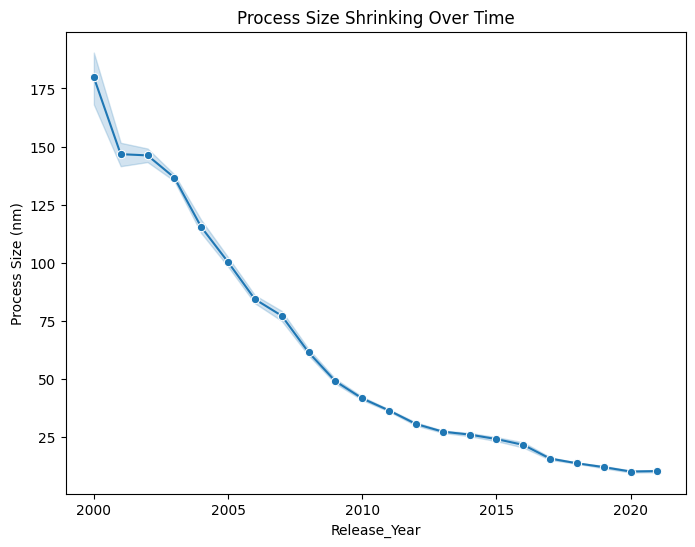

In [36]:
# Process size trend
plt.figure(figsize=(8,6))
sns.lineplot(x="Release_Year", y="Process Size (nm)", data=df_clean, marker="o")
plt.title("Process Size Shrinking Over Time")
plt.show()